# Evaluation Project 5 - Heart Disease Dataset

Objective - To develop an ML model to predict Heart Disease in a patient

Approach - Since target variable is categorical in nature, hence a calssification model will be suitable 

# Importing Required Libraries

# Importing dataset

In [123]:
hdd = pd.read_csv('heartdisease_data.csv')

<IPython.core.display.Javascript object>

# Loading the dataset

In [124]:
hdd.head(5)

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


# Performing EDA/Preprocessing/Data Prepration & Analysis

In [125]:
# Assigning names to all columns
hdd.columns =['age','sex','chest pain tye','Resting BP','Serium Chelostrol','Fasting Blood Sugar',
              'resting ecg','Max HRA','Exercise induced angina','ST depression','Peak exercise ST segment',
              'coloured','thal','num']
#Checcking assigned names
hdd.tail()

,age,sex,chest pain tye,Resting BP,Serium Chelostrol,Fasting Blood Sugar,resting ecg,Max HRA,Exercise induced angina,ST depression,Peak exercise ST segment,coloured,thal,num
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0
198,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [126]:
# Maping the target variable to 0 & 1 categories as 0 = No heart disease, 1 = Confirmed heart disease case
hdd['num'] = hdd.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [127]:
hdd # checking the dataset

,age,sex,chest pain tye,Resting BP,Serium Chelostrol,Fasting Blood Sugar,resting ecg,Max HRA,Exercise induced angina,ST depression,Peak exercise ST segment,coloured,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,1
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,1
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Since its a medical case hence to understanding the importance of various columns in dataset it will be good to have the information readily available (Significane of key columns in dataset):

1. Age: Age is the most important risk factor in developing cardiovascular or heart diseases.
2. Sex: Men are at greater risk of heart disease than pre-menopausal women.
3. Angina (Chest Pain): Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.
4. Resting Blood Pressure: Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.
5. Serum Cholesterol: A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.
6. Fasting Blood Sugar: Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.
7. Resting ECG: For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk, current evidence is insufficient to assess the balance of benefits and harms of screening.
8. Max heart rate achieved: The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.
9. Exercise induced angina: The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands. o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina.
10. Peak exercise ST segment: A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease. The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.

In [128]:
hdd.isnull().sum()

age                         0
sex                         0
chest pain tye              0
Resting BP                  0
Serium Chelostrol           0
Fasting Blood Sugar         0
resting ecg                 0
Max HRA                     0
Exercise induced angina     0
ST depression               0
Peak exercise ST segment    0
coloured                    0
thal                        0
num                         0
dtype: int64

In [129]:
hdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       199 non-null    int64 
 1   sex                       199 non-null    int64 
 2   chest pain tye            199 non-null    int64 
 3   Resting BP                199 non-null    object
 4   Serium Chelostrol         199 non-null    object
 5   Fasting Blood Sugar       199 non-null    object
 6   resting ecg               199 non-null    int64 
 7   Max HRA                   199 non-null    object
 8   Exercise induced angina   199 non-null    object
 9   ST depression             199 non-null    object
 10  Peak exercise ST segment  199 non-null    object
 11  coloured                  199 non-null    object
 12  thal                      199 non-null    object
 13  num                       199 non-null    int64 
dtypes: int64(5), object(9)
mem

In [130]:
hdd.replace('?',np.NaN, inplace =True) # Assigning NaN to ?

<IPython.core.display.Javascript object>

In [131]:
hdd # Checking the assignment

,age,sex,chest pain tye,Resting BP,Serium Chelostrol,Fasting Blood Sugar,resting ecg,Max HRA,Exercise induced angina,ST depression,Peak exercise ST segment,coloured,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,1
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,1
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [132]:
#Rechecking Null values
hdd.isnull().sum()

age                           0
sex                           0
chest pain tye                0
Resting BP                   56
Serium Chelostrol             7
Fasting Blood Sugar           7
resting ecg                   0
Max HRA                      53
Exercise induced angina      53
ST depression                56
Peak exercise ST segment    102
coloured                    197
thal                        165
num                           0
dtype: int64

<IPython.core.display.Javascript object>

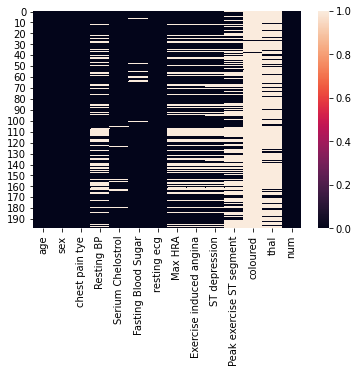

In [133]:
sns.heatmap(hdd.isnull()) # Confirming null values visually

In [134]:
hdd.drop(['Peak exercise ST segment','coloured','thal'], axis = 1, inplace = True) # droping identified columns since 
#not very critical unlike Peak exercise ST segment
hdd.dropna(inplace =True) # Now removing all NaN values assuming highly accurate & clean data will be good for 
#building a ML model in medical science (approach can be reconfirmed if model accuracy will not be good)

In [135]:
hdd[hdd['num']==1]['age'].value_counts() 

63    8
55    8
58    7
62    7
64    6
57    6
61    6
60    5
67    4
59    4
56    4
54    4
65    3
69    3
74    3
53    3
68    2
46    2
75    2
52    2
48    1
49    1
43    1
40    1
77    1
50    1
66    1
70    1
71    1
72    1
38    1
Name: age, dtype: int64

In [136]:
hdd.describe() # Checking stast summary

,age,sex,chest pain tye,resting ecg,num
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,59.372093,0.961240,3.651163,0.713178,0.775194
std,7.795301,0.193774,0.692044,0.698143,0.419082
min,37.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,4.000000,0.000000,1.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,2.000000,1.000000


In [137]:
hdd[hdd['num']==1]['sex'].value_counts() 

1    97
0     3
Name: sex, dtype: int64

In [138]:
hdd.skew()

age                       -0.474750
sex                       -4.835565
chest pain tye            -2.139782
Resting BP                -1.417524
Serium Chelostrol         -0.565430
Fasting Blood Sugar        0.715453
resting ecg                0.460031
Max HRA                    0.087898
Exercise induced angina   -0.641822
ST depression              0.452005
num                       -1.333999
dtype: float64

# Visualization

Univariate

<IPython.core.display.Javascript object>

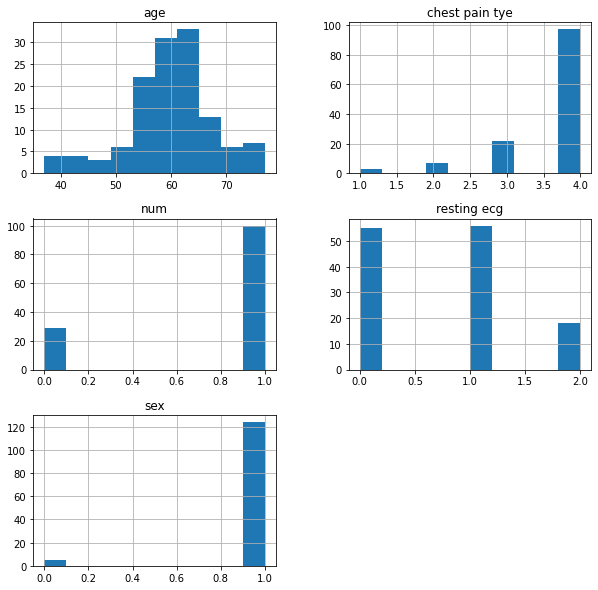

In [139]:
hdd.hist(figsize=(10,10))
plt.show()

<IPython.core.display.Javascript object>

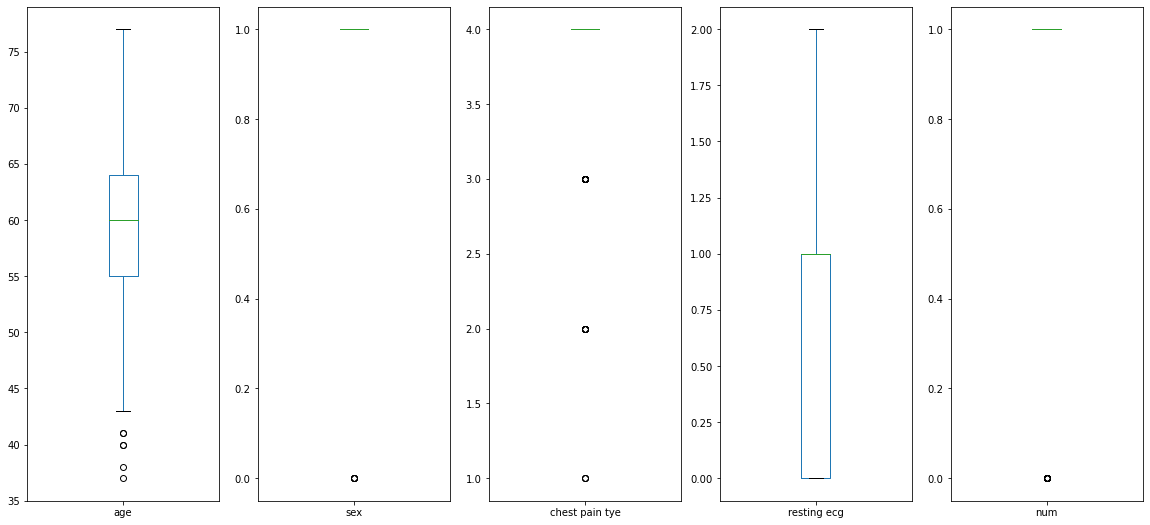

In [140]:
hdd.plot( kind = 'box', subplots = True, layout =(2,5), figsize=(20,20))
plt.show()

In [141]:
hdd_cor = hdd.corr()

<IPython.core.display.Javascript object>

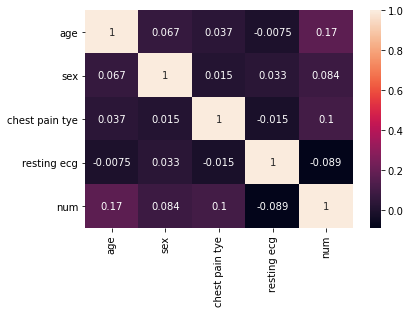

In [142]:
sns.heatmap(hdd_cor, annot = True)

<IPython.core.display.Javascript object>

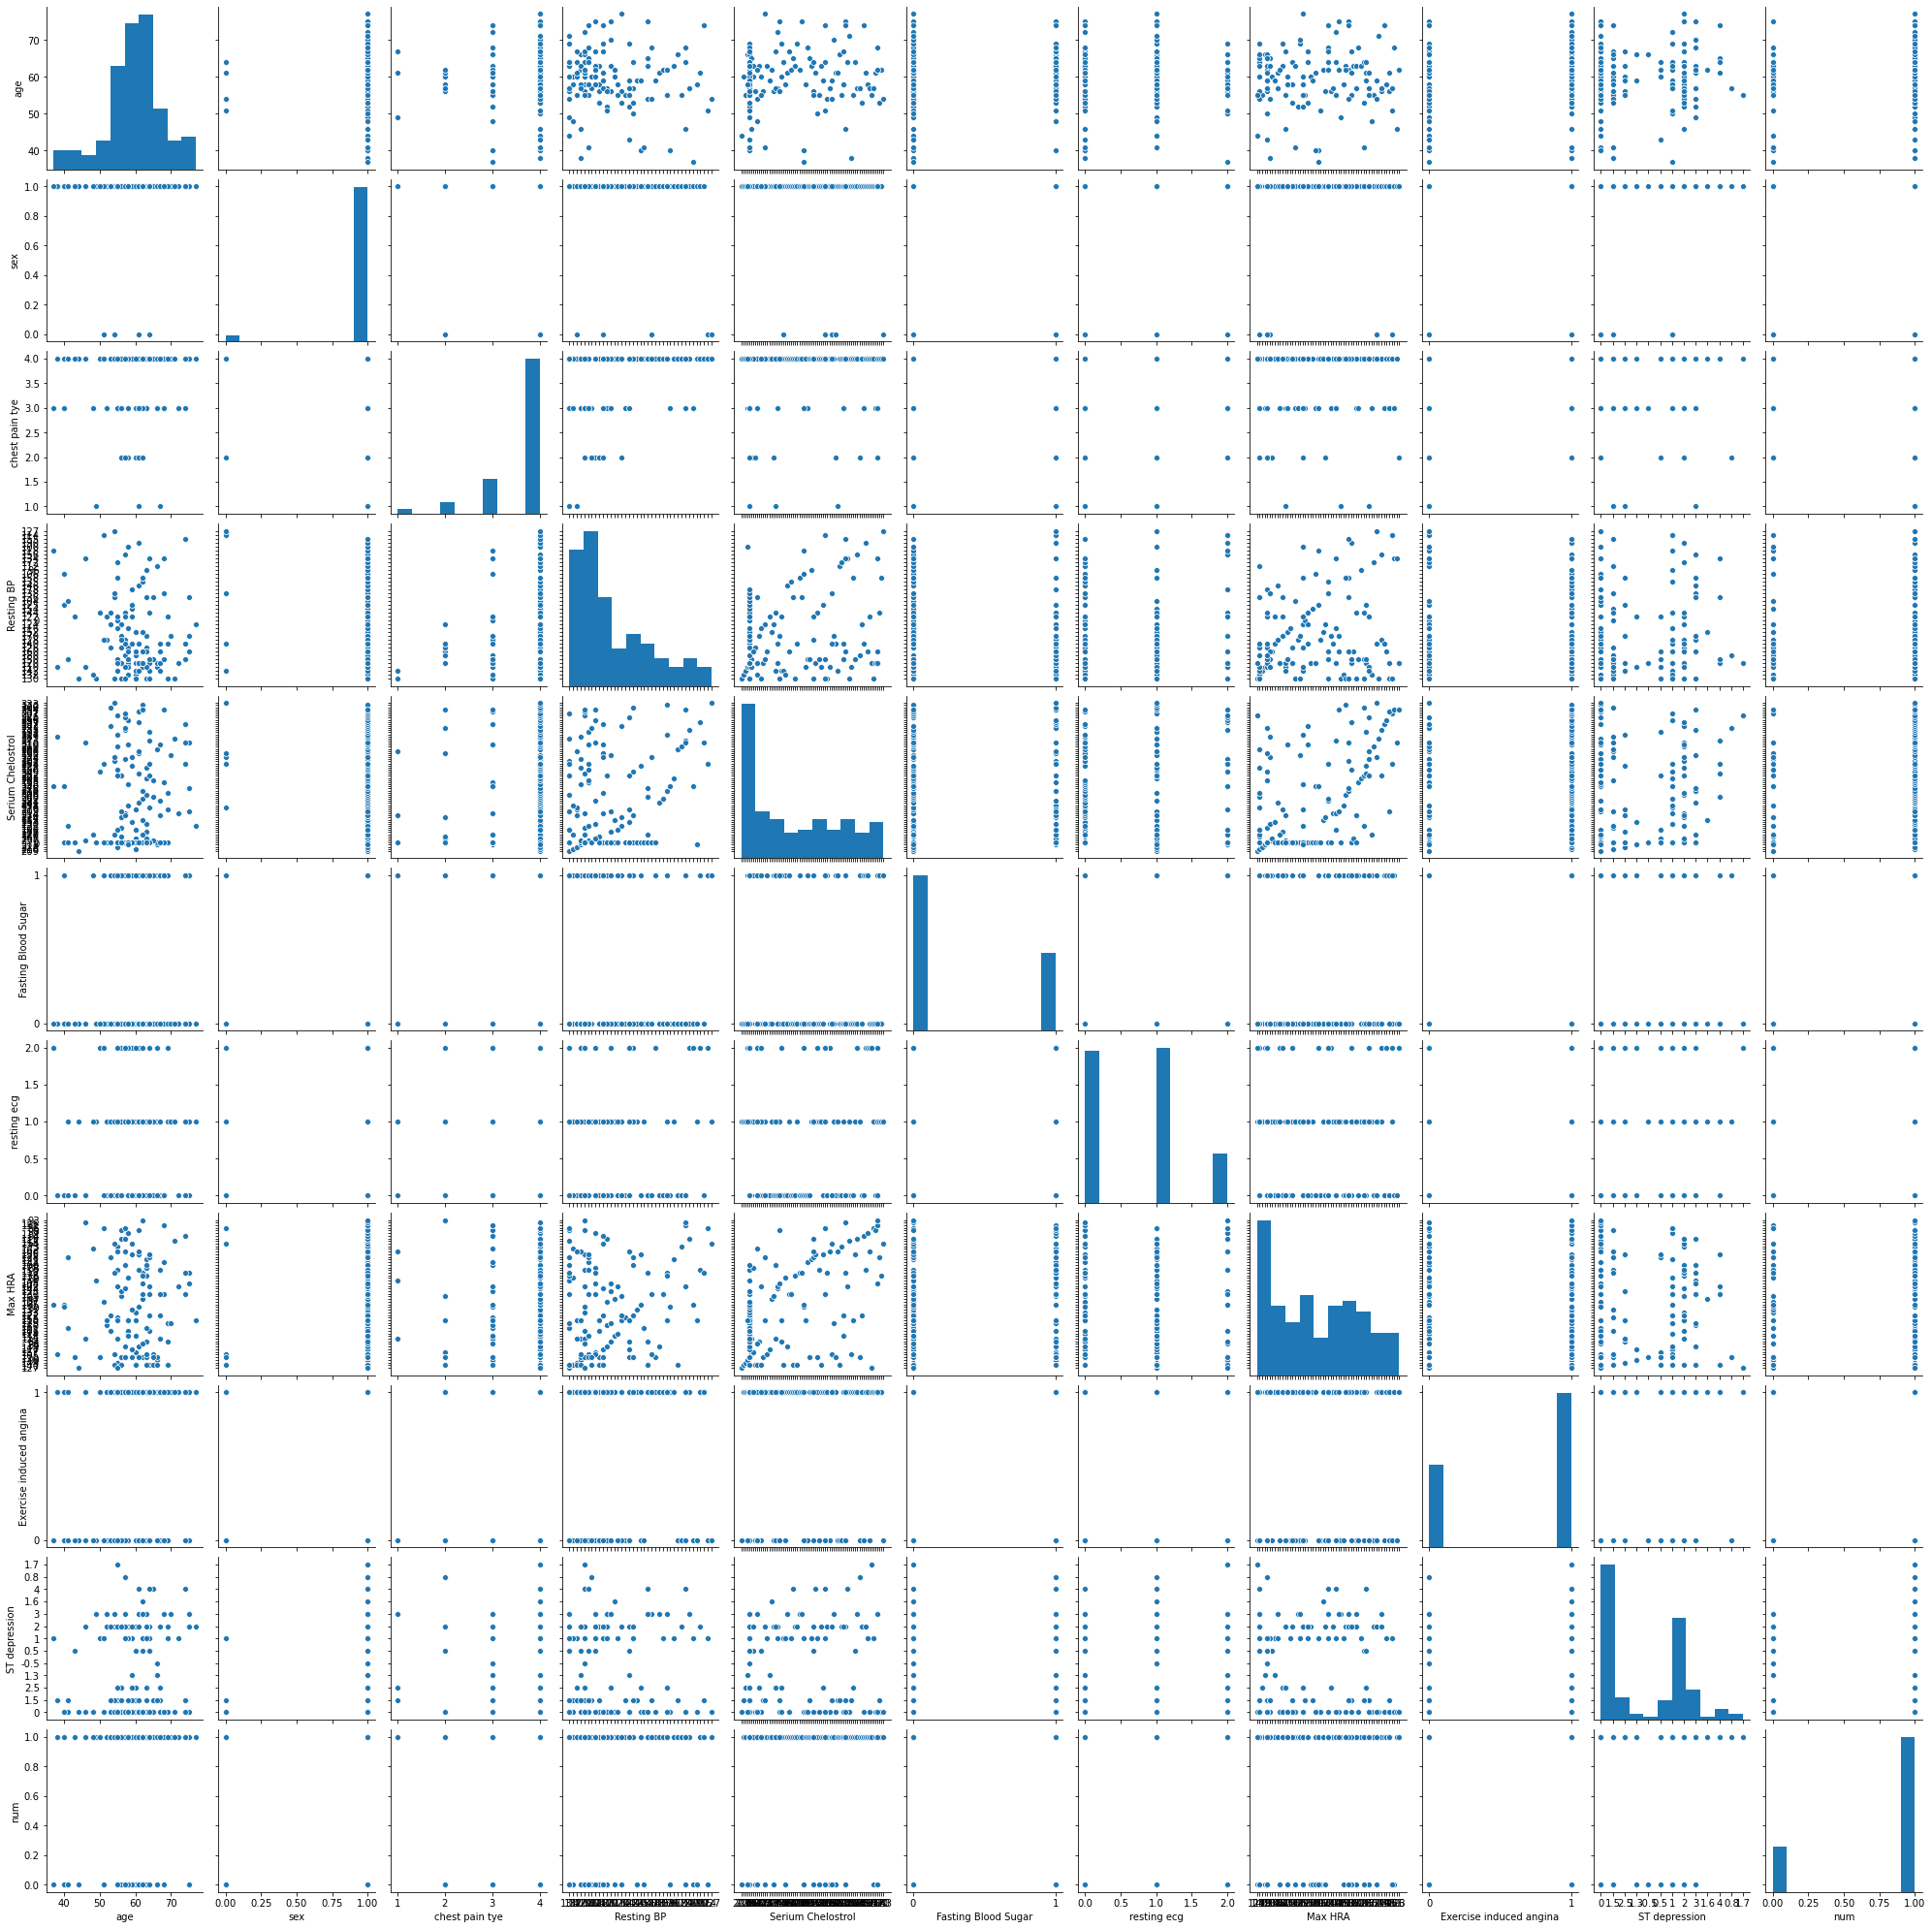

In [143]:
sns.pairplot(hdd)

# Building the model

In [144]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.linear_model import LogisticRegression

In [145]:
# Spliting data into dependent & independent variables
x = (pd.DataFrame(hdd.drop(['num'], axis=1))).astype(float)
y = hdd['num']

<IPython.core.display.Javascript object>

In [146]:
#Identifying best random state
import warnings
warnings.filterwarnings('ignore')
best_r_state = 0
accu = 0
for i in range (30,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    svc =LogisticRegression()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 96.55172413793103% best random state is 198


In [147]:
#Identifying best algorith with the identified random state
list=[LogisticRegression(),KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(), 
      DecisionTreeClassifier(), xgboost.XGBClassifier(), GradientBoostingClassifier()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 198)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between accuracy score & cv score = {round((accuracy_score(y_test,pred)*100)-(cv_score*100))}\n')

For algorithm LogisticRegression() Accuracy Score is 100.0
For algorithm LogisticRegression() cross validation score is 78.26923076923077
Difference between accuracy score & cv score = 22.0

For algorithm KNeighborsClassifier() Accuracy Score is 84.61538461538461
For algorithm KNeighborsClassifier() cross validation score is 76.73076923076923
Difference between accuracy score & cv score = 8.0

For algorithm RandomForestClassifier() Accuracy Score is 80.76923076923077
For algorithm RandomForestClassifier() cross validation score is 76.02564102564104
Difference between accuracy score & cv score = 5.0

For algorithm AdaBoostClassifier() Accuracy Score is 53.84615384615385
For algorithm AdaBoostClassifier() cross validation score is 65.89743589743591
Difference between accuracy score & cv score = -12.0

For algorithm DecisionTreeClassifier() Accuracy Score is 53.84615384615385
For algorithm DecisionTreeClassifier() cross validation score is 65.89743589743591
Difference between accuracy sco

In [153]:
# Building the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 198)
lrc = LogisticRegression()
lrc.fit(x_train,y_train)
pred = lrc.predict(x_test)
print(f'Accuracy Score is {accuracy_score(y_test,pred)*100}')
print(f'Confusion matrix is \n {confusion_matrix(y_test,pred)}')
print(f'Classification report is \n {classification_report(y_test,pred)}')
print(f'Mean CV Score is {cross_val_score(m,x,y,cv= 10).mean()}')

Accuracy Score is 100.0
Confusion matrix is 
 [[ 2  0]
 [ 0 24]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        24

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Mean CV Score is 0.7044871794871794


The auc score is 100.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

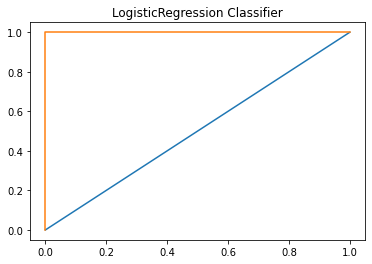

In [154]:
# Testing the model
y_pred_prob = lrc.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(f'The auc score is {round(auc_score*100)}%')
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'AdaBoost Classifier')
plt.title('LogisticRegression Classifier')
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

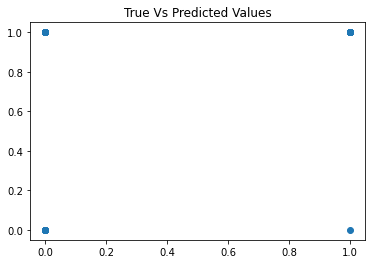

In [150]:
#Testing the model
pred_y = lrc.predict(x)
plt.scatter(y,pred_y)
plt.title('True Vs Predicted Values')
plt.show()

In [151]:
# checking model with LeaveOneOutCV since datasize is very small & cross_val_score is negative
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
X,Y = make_blobs(n_samples = 1000, random_state = 198)
cv = LeaveOneOut()
y_true,y_pred = [],[]
for train_ix,test_ix in cv.split(X):
    X_train,X_test = X[train_ix, :], X[test_ix, :]
    Y_train,Y_test = Y[train_ix], Y[test_ix]
    lrc = LogisticRegression()
    lrc.fit(X_train,Y_train)
    y_p = lrc.predict(X_test)
    y_true.append(Y_test[0])
    y_pred.append(y_p[0])
    acc = accuracy_score(y_true, y_pred)
print(f'Accuracy score for LOOCV is {acc*100}%')

Accuracy score for LOOCV is 100.0%


# Conclusion :Accuracy Score Acheived with Logistic regression, & upon using Leave one out CV too is 100% with default parameters, hence hyperparametertuning can be ignored and model shall be tested with large dataset.

# Saving the Best Model

In [157]:
import joblib
joblib.dump(lrc,'Heart Disease Prediction.obj')

['Heart Disease Prediction.obj']

In [158]:
joblib.load('Heart Disease Prediction.obj')

LogisticRegression()